Spectral Density example

In [1]:
%matplotlib inline
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

We generate a sine wave with noise

In [2]:
sample_freq = 1000.0
N_samples = 10000.0
amplitude = np.sqrt(2)
sine_freq = 300.0
noise_power = 0.001 * sample_freq / 2
time = np.arange(N_samples) / sample_freq
x = amplitude*np.sin(2*np.pi*sine_freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
f, Pxx_den = signal.welch(x, sample_freq, nperseg=1024)

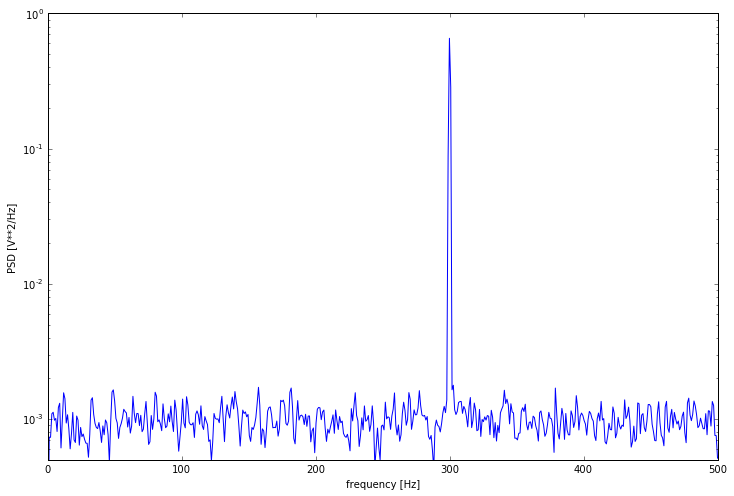

In [3]:
f1 = plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
ax1 = f1.add_subplot(111)
ax1.semilogy(f, Pxx_den)
ax1.set_ylim([0.5e-3, 1])
ax1.set_xlabel('frequency [Hz]')
ax1.set_ylabel('PSD [V**2/Hz]')

We see the peak in the spectral density at the frequency of the sine wave as expected.
Rest of the spectral density is from the noise.

In [4]:
f1.savefig('figures/spectraldensity_example.pdf')

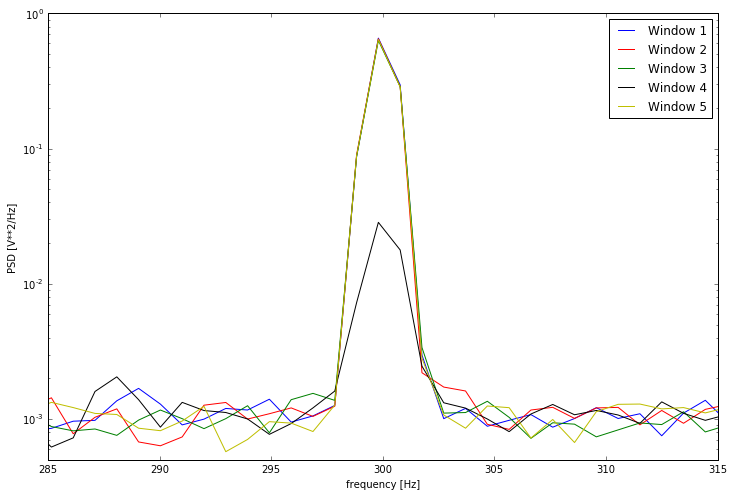

In [5]:
N_samples = 50000.0
sample_freq = 1000.0
amplitude = np.sqrt(2)
sine_freq = 300.0
sine_freq_error = 100.0
noise_power = 0.001 * sample_freq / 2
time = np.arange(N_samples) / sample_freq
x = amplitude*np.sin(2*np.pi*sine_freq*time)
x[29000:39000] = amplitude
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
f, Pxx_den = signal.welch(x, sample_freq, nperseg=1024)

f2 = plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
ax2 = f2.add_subplot(111)
ax2.set_ylim([0.5e-3, 1])
ax2.set_xlim([285, 315])
ax2.set_xlabel('frequency [Hz]')
ax2.set_ylabel('PSD [V**2/Hz]')
colors = ['b', 'r', 'g', 'k', 'y']
for i in np.arange(5):
    f, Pxx_den = signal.welch(x[10000*i:10000*(i+1)], sample_freq, nperseg=1024)
    ax2.semilogy(f, Pxx_den, color=colors[i], label='Window ' + str(i+1))
ax2.legend()
f2.savefig('figures/spectralwindow_example.pdf')